In [ ]:
# import the necessary packages
from __future__ import print_function
import numpy as np
import json
import cv2
from IPython.display import Image, HTML, display
from glob import glob
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
def filter_by_decade(decade, data):
    # initialize the list of filtered rows
    filtered = []
 
    # loop over the rows in the data list
    for row in data:
        # grab the publication date of the magazine
        pub = int(row["pubDate"].split("-")[0])
 
        # if the publication date falls within the current decade,
        # then update the filtered list of data
        if pub >= decade and pub < decade + 10:
            filtered.append(row)
 
    # return the filtered list of data
    print("Number of covers in decade: {}".format(len(filtered)))

    return filtered

In [5]:
# load the JSON data file
data = json.loads(open("C:/Users/Yoichi/timecoverspider/timecoverspider/spiders/output.json").read())

In [7]:
# create average image per decade
# loop over each individual decade Time magazine has been published
for decade in np.arange(1920, 2020, 10):
    # initialize the magazine covers list
    print("[INFO] processing years: {}-{}".format(decade, decade + 9))
    covers = []
    list_of_avg = []
    # loop over the magazine issues belonging to the current decade
    for row in filter_by_decade(decade, data):
        # load the image
        cover = cv2.imread("output/{}".format(row["files"][0]["path"]))
     
        # if the image is None, then there was an issue loading it
        # (this happens for ~3 images in the dataset, likely due to
        # a download problem during the scraping process)
        if cover is not None:
            # resize the magazine cover, flatten it into a single
            # list, and update the list of covers
            cover = cv2.resize(cover, (400, 527)).flatten()
            covers.append(cover)
 
    # compute the average image of the covers then write the average
    # image to disk
    avg = np.average(covers, axis=0).reshape((527, 400, 3)).astype("uint8")
    p = "{}.png".format(decade)
    cv2.imwrite(p, avg)  
    list_of_avg.append(p)

[INFO] processing years: 1920-1929
Number of covers in decade: 170
[INFO] processing years: 1930-1939
Number of covers in decade: 271
[INFO] processing years: 1940-1949
Number of covers in decade: 267
[INFO] processing years: 1950-1959
Number of covers in decade: 289
[INFO] processing years: 1960-1969
Number of covers in decade: 316
[INFO] processing years: 1970-1979
Number of covers in decade: 304
[INFO] processing years: 1980-1989
Number of covers in decade: 297
[INFO] processing years: 1990-1999
Number of covers in decade: 278
[INFO] processing years: 2000-2009
Number of covers in decade: 354
[INFO] processing years: 2010-2019
Number of covers in decade: 216


In [30]:
# Show all averaged images
imagesList=''.join( ["<img style='width: 120px; margin: 0px; float: left; border: 1px solid black;' src='%s' />" % str(s) 
                 for s in sorted(glob('*.png')) ])
display(HTML(imagesList))

In [23]:
# Loop through all images store in large list for clustering also store decade indentifier
covers = []
decade_labels = []
# loop over all
for row in data:
    # load the image
    cover = cv2.imread("output/{}".format(row["files"][0]["path"]))
     
    # if the image is None, then there was an issue loading it
    # (this happens for ~3 images in the dataset, likely due to
    # a download problem during the scraping process)
    if cover is not None:
            # resize the magazine cover (smaller for kmeans), flatten it into a single
            # list, and update the list of decade labels
            cover = cv2.resize(cover, (64,64)).flatten()
            covers.append(cover)
            label_date = row['pubDate']
            decade_labels.append(label_date)

In [24]:
# cluster using kmeans
# first convert to np array
data_covers = np.array(covers)
# perform kmeans assuming 10 groups based on decades
kmeans = KMeans(n_clusters=10,random_state=0)
cluster = kmeans.fit_predict(data_covers)
# reshape centroids into image format
centers = kmeans.cluster_centers_.reshape((10,64,64, 3))


In [29]:
# save out "centroids"
for x in xrange(0,10):
    test=centers[x]
    p = "output/test{}.png".format(x)
    cv2.imwrite(p, test)  

In [31]:
# plot centroids
imagesList=''.join( ["<img style='width: 120px; margin: 0px; float: left; border: 1px solid black;' src='%s' />" % str(s) 
                 for s in sorted(glob('output/*.png')) ])
display(HTML(imagesList))

In [32]:
# Show original averaged images by decade
imagesList=''.join( ["<img style='width: 120px; margin: 0px; float: left; border: 1px solid black;' src='%s' />" % str(s) 
                 for s in sorted(glob('*.png')) ])
display(HTML(imagesList))

In [100]:
# Convert year from decade label to np array for plotting
year_labels = [item[:4] for item in decade_labels]
year_data=np.array(year_labels)
year_data=np.asfarray(year_data,float)

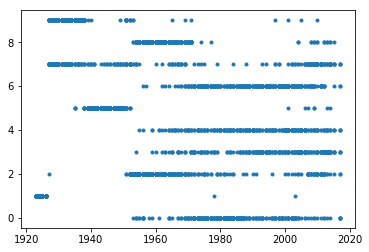

In [99]:
# Plot year of cover versus classification group
plt.plot(year_data,kmeans.labels_,'.')
plt.show()
